In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as pdr
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
import datetime

In [2]:

# download stocks
file = pd.read_csv('M6_Universe.csv')
stocks_list = file['symbol'].values.tolist()

end = datetime.datetime.now()
start = datetime.datetime(end.year - 3, end.month, end.day)

last_month_days = []
for year in range(start.year, end.year+1):
    for month in range(1,13):
        first_day = datetime.datetime(year, month, 1)
        prev_day = first_day - datetime.timedelta(days=1)
        last_month_days += [prev_day.strftime('%Y-%m-%d')]
last_month_days

['2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31',
 '2020-04-30',
 '2020-05-31',
 '2020-06-30',
 '2020-07-31',
 '2020-08-31',
 '2020-09-30',
 '2020-10-31',
 '2020-11-30',
 '2020-12-31',
 '2021-01-31',
 '2021-02-28',
 '2021-03-31',
 '2021-04-30',
 '2021-05-31',
 '2021-06-30',
 '2021-07-31',
 '2021-08-31',
 '2021-09-30',
 '2021-10-31',
 '2021-11-30',
 '2021-12-31',
 '2022-01-31',
 '2022-02-28',
 '2022-03-31',
 '2022-04-30',
 '2022-05-31',
 '2022-06-30',
 '2022-07-31',
 '2022-08-31',
 '2022-09-30',
 '2022-10-31',
 '2022-11-30']

In [3]:
all_stocks = DataReader(stocks_list, 'yahoo', start, end)['Adj Close']
spy = DataReader(['SPY'], 'yahoo', start, end)['Adj Close']

marketCaps = pdr.get_quote_yahoo(stocks_list)['marketCap']
all_stocks.describe()

Symbols,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLF,XLV,XLE,XLY,XLI,XLC,XLU,XLP,XLB,VXX
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,100.613220,256.255937,84.087936,137.404454,113.909556,93.564760,205.373037,139.056518,189.950338,156.318346,...,30.658379,111.844667,48.771690,151.855118,85.965978,63.444057,61.671326,64.449269,69.403108,66.728512
std,27.625840,62.740920,7.097358,25.554047,14.939822,37.264498,65.181635,31.543926,33.883897,40.759725,...,6.115566,16.936969,14.605545,29.139762,14.157997,11.885204,5.820225,7.194457,13.674765,45.670588
min,54.571526,138.960968,64.803185,77.114677,76.430481,37.178925,79.106972,83.830498,111.204727,76.020439,...,16.901663,72.100311,21.039658,85.628136,47.169888,39.391167,41.872684,45.845879,36.707245,17.629999
25%,78.814373,200.015556,79.513424,119.218300,99.970268,58.244326,149.432190,107.552750,157.491131,116.193953,...,25.261276,97.760031,36.363008,123.355017,74.783817,53.387372,57.370903,58.041846,56.663607,26.097500
50%,98.708073,251.155022,83.109253,131.106232,112.661373,91.085003,200.724129,154.467499,192.039742,154.843239,...,29.910725,111.622551,48.324141,152.790276,86.696983,61.212978,61.079340,63.870634,71.465176,59.519999
75%,113.216366,309.774597,86.978380,158.247753,127.622448,131.676544,263.355133,164.633247,217.556309,198.680897,...,36.604437,128.931416,53.611535,176.754543,99.848974,75.338516,65.523651,70.159359,82.361940,97.559998
max,171.877823,411.651428,103.672112,192.390640,146.209808,166.292816,325.904755,186.570496,254.599045,224.802582,...,41.039803,142.229568,91.256622,210.293747,106.228661,85.302856,76.349014,79.969498,89.927559,276.000000


In [4]:
# extract monthly stock prices
month_stocks = all_stocks.copy()
month_stocks['Datestring'] = month_stocks.index
    
month_stocks['year'] = pd.DatetimeIndex(month_stocks.index).year
month_stocks['month'] = pd.DatetimeIndex(month_stocks.index).month

month_on_month = month_stocks.sort_values(by='Date').groupby(['year','month']).last()
month_on_month = month_on_month.drop(month_on_month.tail(1).index).set_index(['Datestring'])

month_on_month

Symbols,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLF,XLV,XLE,XLY,XLI,XLC,XLU,XLP,XLB,VXX
Datestring,,,,,,,,,,,,,,,,,,,,,
2019-07-31,57.725544,184.731033,79.521866,107.192894,99.904007,47.782509,136.296555,93.338997,189.023163,109.304123,...,26.538498,86.352661,52.419033,117.427055,73.925659,49.510075,54.103508,54.930912,54.890244,94.360001
2019-08-30,56.963036,190.093170,83.167549,116.875092,92.889297,46.685719,121.652725,88.814499,192.436264,109.970200,...,25.289080,85.841026,48.054951,116.318153,71.968773,48.291332,56.856384,56.123260,53.337799,108.000000
2019-09-30,65.610611,184.510391,85.485100,119.554657,100.280006,48.513485,138.743347,86.795502,196.328278,108.612175,...,26.437746,85.750412,49.945580,117.797066,74.136009,48.394196,59.273712,57.106121,55.033833,94.959999
2019-10-31,69.934364,178.627014,86.123802,119.792213,112.267159,52.752335,142.318024,88.833000,198.452682,122.278351,...,27.098692,90.145912,48.899418,117.943474,74.976402,49.469185,58.825085,56.864395,55.024368,79.000000
2019-11-29,77.125595,193.790390,83.989212,126.857735,116.127434,56.485847,155.560699,90.040001,195.489487,124.678787,...,28.467785,94.655586,49.684040,119.504982,78.347534,51.365093,57.726402,57.645390,56.773731,66.160004
2019-12-31,77.837692,202.855652,86.894577,125.148727,120.755852,59.549160,158.133286,92.391998,192.596878,125.675293,...,29.210585,97.945129,52.678108,122.807091,78.189964,52.524815,59.625912,59.036217,58.398834,60.480000
2020-01-31,72.188972,198.456299,95.822174,124.652252,125.390625,56.573650,157.022583,100.435997,199.016800,126.078789,...,28.432398,95.329674,46.887379,122.709183,77.844429,52.799053,63.648945,59.223690,54.795258,64.800003
2020-02-28,76.367783,174.646576,82.633324,115.648026,111.496025,56.879150,134.867462,94.187500,184.229904,109.987488,...,25.234228,89.050659,39.719154,113.416893,70.137749,49.713963,57.374477,54.358692,50.126778,91.239998
2020-03-31,67.885437,157.886917,74.042282,99.824226,89.480064,44.841747,97.814705,97.486000,136.521240,98.339066,...,19.925974,85.588921,26.067303,96.502670,57.073929,43.450394,51.639557,51.351528,43.110683,185.000000


In [5]:
monthly_returns = month_on_month.pct_change().round(3).T
monthly_returns

Datestring,2019-07-31,2019-08-30,2019-09-30,2019-10-31,2019-11-29,2019-12-31,2020-01-31,2020-02-28,2020-03-31,2020-04-30,...,2021-09-30,2021-10-29,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-29,2022-05-31,2022-06-30
Symbols,,,,,,,,,,,,,,,,,,,,,
ABBV,NaN,-0.013,0.152,0.066,0.103,0.009,-0.073,0.058,-0.111,0.095,...,-0.107,0.076,0.005,0.175,0.021,0.079,0.097,-0.086,0.003,0.039
ACN,NaN,0.029,-0.029,-0.032,0.085,0.047,-0.022,-0.120,-0.096,0.139,...,-0.049,0.125,-0.004,0.160,-0.145,-0.106,0.067,-0.107,-0.006,-0.070
AEP,NaN,0.046,0.028,0.007,-0.025,0.035,0.103,-0.138,-0.104,0.039,...,-0.094,0.043,-0.034,0.098,0.016,0.012,0.101,-0.007,0.038,-0.060
AIZ,NaN,0.090,0.023,0.002,0.059,-0.013,-0.004,-0.072,-0.137,0.021,...,-0.073,0.023,-0.053,0.025,-0.021,0.117,0.071,0.000,-0.025,-0.022
ALLE,NaN,-0.070,0.080,0.120,0.034,0.040,0.038,-0.111,-0.197,0.093,...,-0.080,-0.029,-0.036,0.074,-0.073,-0.067,-0.038,0.041,-0.023,-0.120
AMAT,NaN,-0.023,0.039,0.087,0.071,0.054,-0.050,0.005,-0.212,0.084,...,-0.047,0.062,0.079,0.069,-0.122,-0.027,-0.018,-0.163,0.065,-0.224
AMP,NaN,-0.107,0.140,0.026,0.093,0.017,-0.007,-0.141,-0.275,0.122,...,-0.032,0.144,-0.038,0.042,0.009,-0.011,0.002,-0.116,0.045,-0.140
AMZN,NaN,-0.048,-0.023,0.023,0.014,0.026,0.087,-0.062,0.035,0.269,...,-0.054,0.027,0.040,-0.049,-0.103,0.027,0.061,-0.238,-0.033,-0.116
AVB,NaN,0.018,0.020,0.011,-0.015,-0.015,0.033,-0.074,-0.259,0.107,...,-0.035,0.076,0.009,0.064,-0.033,-0.023,0.047,-0.084,-0.086,-0.058


In [6]:
# Rank generator helpers (pandas ranking does not handle ties on margins of classes as explained in M6 description)
def generate_rank(df):
    ranks = pd.DataFrame(index=df.index, columns=df.columns)
    vector_ranks = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        if df[col].isnull().all():
            continue
        ranks[col], vector_ranks[col] = generate_rank_from_values(df[col].values)
        
    return ranks, vector_ranks

def generate_rank_from_values(value_list):
    if len(value_list) != 100:
        print('Values list not 100 in number')
        return
    df = pd.DataFrame(value_list, columns=['data'])
    orig_index = df.index
    #df[241] = [random.randint(1,20) for i in range(100)]
    df = df.sort_values('data',ascending=False)
    df['my100rank'] = range(100,0,-1)
    df['my5rank'] = [5]*20 + [4]*20 + [3]*20 + [2]*20 + [1]*20
    df['pyrank'] = df['data'].rank()
    df['5rank'] = pd.qcut(df['data'], 5, labels=False, precision=1) + 1
    df['diff'] = df['my5rank'] != df['5rank']
    uniq_ranks = df[df['diff'] == True]['pyrank'].unique()
    df['adjusted5rank'] = df['my5rank']
    df['rankvector'] = np.nan
    
    df = df.join(pd.get_dummies(df['my5rank']))
    
    
    # ties on the margins of the classes
    for rank in uniq_ranks:
        rank_index = df[df['pyrank']==rank].index
        population = df['my5rank'][rank_index]
        df.loc[rank_index,'adjusted5rank'] = round(population.mean(),2)
        for p in population:
            df.loc[rank_index, p] = round(sum(population == p) / len(population),2)
            
    
    
    #print(df.to_string())
    ranks = df['adjusted5rank'][orig_index].values.tolist()
    vector_ranks = []
    for index, row in df.loc[orig_index].iterrows():
        vector_ranks.append([row[1],row[2],row[3],row[4],row[5]])
    
    # clean house
    for p in [1,2,3,4,5]:
        df[f'Rank {p}'] = df[p]
    df = df.drop(columns=[1,2,3,4,5])
    return ranks, vector_ranks

ranks, vector_ranks = generate_rank(monthly_returns)
ranks

Datestring,2019-07-31,2019-08-30,2019-09-30,2019-10-31,2019-11-29,2019-12-31,2020-01-31,2020-02-28,2020-03-31,2020-04-30,...,2021-09-30,2021-10-29,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-29,2022-05-31,2022-06-30
Symbols,,,,,,,,,,,,,,,,,,,,,
ABBV,NaN,3.0,5.0,5.0,5.0,2.00,1.0,5.0,4.0,3.00,...,1.00,4.33,4.5,5.0,5.0,5,5,2.00,3,5.0
ACN,NaN,5.0,1.0,1.0,5.0,4.00,3.0,2.0,4.0,4.00,...,2.00,5.00,4.0,5.0,1.0,1,4,1.00,2,3.0
AEP,NaN,5.0,3.0,3.0,1.0,4.00,5.0,1.0,4.0,1.00,...,1.00,3.00,3.0,5.0,5.0,4,5,4.00,4,4.0
AIZ,NaN,5.0,3.0,2.0,5.0,1.00,3.0,3.0,3.0,1.00,...,1.50,2.00,2.0,2.0,4.0,5,5,5.00,2,4.0
ALLE,NaN,1.0,5.0,5.0,4.0,4.00,5.0,2.0,2.0,3.00,...,1.00,1.00,3.0,4.0,2.0,1,1,5.00,2,2.0
AMAT,NaN,3.0,4.0,5.0,5.0,4.00,2.0,5.0,2.0,3.00,...,3.00,4.00,5.0,4.0,1.0,3,1,1.00,5,1.0
AMP,NaN,1.0,5.0,4.0,5.0,2.00,3.0,1.0,1.0,4.00,...,3.00,5.00,2.0,3.0,4.0,3,2,1.00,4,1.0
AMZN,NaN,2.0,1.0,3.0,3.0,3.00,5.0,4.0,5.0,5.00,...,2.00,2.00,5.0,1.0,1.0,4,4,1.00,1,2.0
AVB,NaN,4.5,3.0,3.0,1.0,1.00,5.0,3.0,1.0,3.00,...,3.00,4.33,5.0,4.0,3.0,3,4,2.00,1,4.0


In [7]:
# Peek at last month's data
agg_data = month_on_month.T.copy()
last_month = agg_data.columns[-1]
agg_data = agg_data[[last_month]]

agg_data['Last Month Return'] = monthly_returns[last_month]

monthly_ranks, monthly_vranks = generate_rank(monthly_returns)

agg_data['Last Month Return Rank'] = monthly_ranks[last_month]
agg_data['Last Month Return Rank Vector'] = monthly_vranks[last_month]
agg_data

Datestring,2022-06-30 00:00:00,Last Month Return,Last Month Return Rank,Last Month Return Rank Vector
Symbols,,,,
ABBV,151.740646,0.039,5.0,"[0, 0, 0.0, 0.0, 1]"
ACN,276.665894,-0.070,3.0,"[0, 0, 1.0, 0.0, 0]"
AEP,95.940002,-0.060,4.0,"[0, 0, 0.0, 1.0, 0]"
AIZ,172.850006,-0.022,4.0,"[0, 0, 0.0, 1.0, 0]"
ALLE,97.900002,-0.120,2.0,"[0, 1, 0.0, 0.0, 0]"
AMAT,90.980003,-0.224,1.0,"[1, 0, 0.0, 0.0, 0]"
AMP,237.679993,-0.140,1.0,"[1, 0, 0.0, 0.0, 0]"
AMZN,106.209999,-0.116,2.0,"[0, 1, 0.0, 0.0, 0]"
AVB,194.250000,-0.058,4.0,"[0, 0, 0.0, 1.0, 0]"


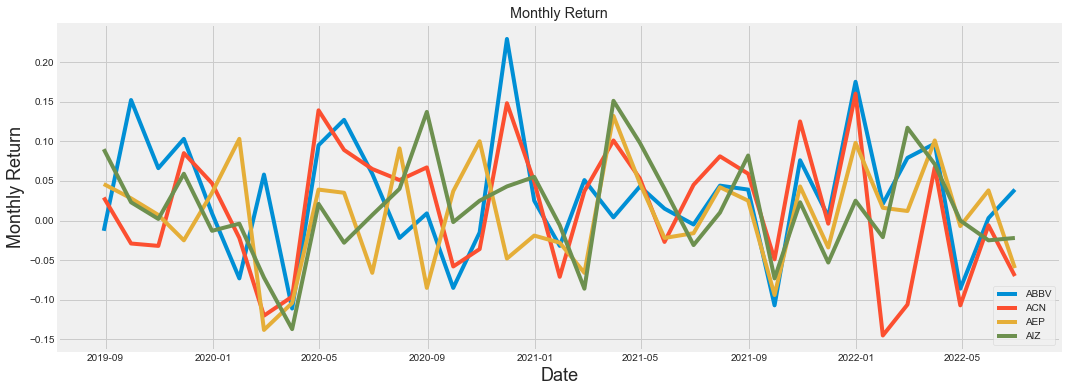

In [8]:
# view of the monthly returns
time_span = 40
plt.figure(figsize=(16,6))
plt.title('Monthly Return')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Monthly Return', fontsize=18)
for stock in stocks_list[:4]:
    plt.plot(monthly_returns.T[stock][-time_span:])

plt.legend(stocks_list[:4], loc='lower right')
plt.show()

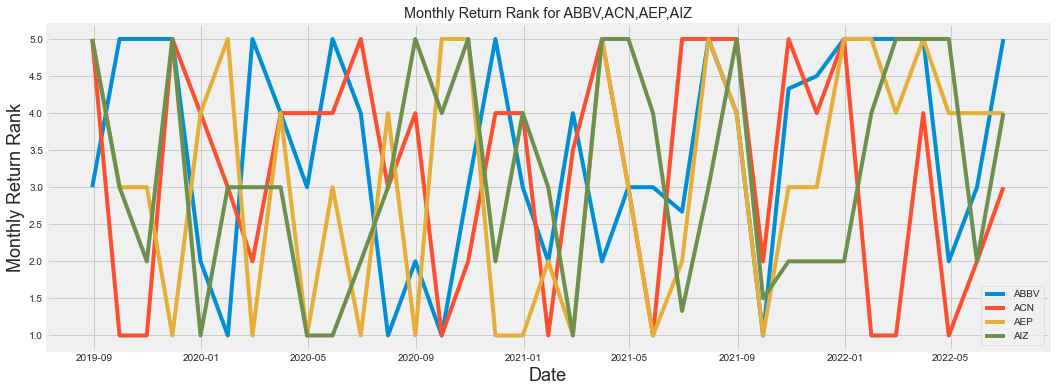

In [9]:
# monthly return ranks
plt.figure(figsize=(16,6))
plt.title(f"Monthly Return Rank for {','.join(stocks_list[:4])}")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Monthly Return Rank', fontsize=18)
for stock in stocks_list[:4]:
    plt.plot(monthly_ranks.T[stock][-60:])

plt.legend(stocks_list[:4], loc='lower right')
plt.show()

In [10]:
# Forecast Performance

def RPS(df, predictions):
    result = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        if df[col].isnull().all():
            continue
        result[col] = RPS_T(df[col].values, predictions)
        
    return result

def RPS_T(actual, predictions):
    result = []
    for x,y in zip(actual, predictions):
        result.append(RPS_i_T(x,y))
        
    return result

def RPS_i_T(actual, predictions):
    actual, predictions = np.array(actual), np.array(predictions)
    return np.mean((predictions - actual) ** 2)

In [11]:
# PMF ranks over the previous 36 months to today
pmf_vranks = []

for row in monthly_ranks.index:
    pmf, bins = np.histogram(monthly_ranks.T[row].dropna().values - 0.001, bins = range(0,6), density=True)
    pmf_vranks.append(np.round(pmf, 3).tolist())
    

agg_data['PMF Rank Vector'] = pmf_vranks
agg_data['PMF Rank'] = np.dot(np.array(pmf_vranks), np.array(range(1,6)))
agg_data['Last Month PMF RPS'] = RPS_T(monthly_vranks[last_month].values.tolist(), pmf_vranks)
agg_data


Datestring,2022-06-30 00:00:00,Last Month Return,Last Month Return Rank,Last Month Return Rank Vector,PMF Rank Vector,PMF Rank,Last Month PMF RPS
Symbols,,,,,,,
ABBV,151.740646,0.039,5.0,"[0, 0, 0.0, 0.0, 1]","[0.114, 0.143, 0.229, 0.114, 0.4]",3.543,0.091776
ACN,276.665894,-0.070,3.0,"[0, 0, 1.0, 0.0, 0]","[0.229, 0.114, 0.114, 0.286, 0.257]",3.228,0.199656
AEP,95.940002,-0.060,4.0,"[0, 0, 0.0, 1.0, 0]","[0.286, 0.057, 0.171, 0.229, 0.257]",3.114,0.154955
AIZ,172.850006,-0.022,4.0,"[0, 0, 0.0, 1.0, 0]","[0.114, 0.257, 0.2, 0.143, 0.286]",3.230,0.187058
ALLE,97.900002,-0.120,2.0,"[0, 1, 0.0, 0.0, 0]","[0.229, 0.229, 0.171, 0.2, 0.171]",2.855,0.149073
AMAT,90.980003,-0.224,1.0,"[1, 0, 0.0, 0.0, 0]","[0.2, 0.114, 0.114, 0.257, 0.314]",3.368,0.166127
AMP,237.679993,-0.140,1.0,"[1, 0, 0.0, 0.0, 0]","[0.171, 0.143, 0.171, 0.257, 0.257]",3.283,0.173806
AMZN,106.209999,-0.116,2.0,"[0, 1, 0.0, 0.0, 0]","[0.286, 0.2, 0.143, 0.114, 0.257]",2.856,0.164258
AVB,194.250000,-0.058,4.0,"[0, 0, 0.0, 1.0, 0]","[0.229, 0.114, 0.257, 0.171, 0.229]",3.057,0.174234


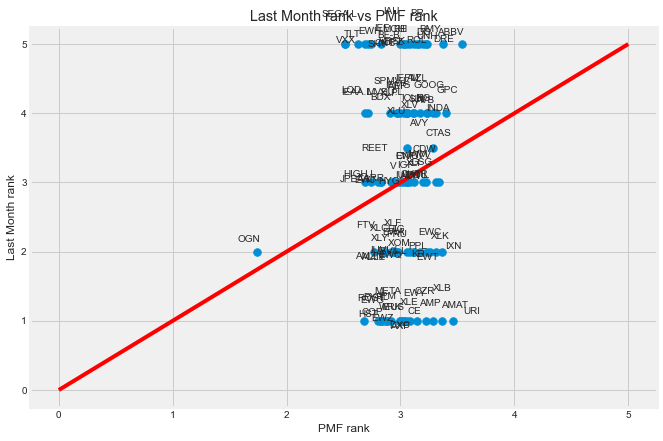

In [12]:
# Monthly Return
import random

area = np.pi * 20

plt.figure(figsize=(10,7))
plt.scatter(agg_data['PMF Rank'], agg_data['Last Month Return Rank'], s=area)
plt.xlabel('PMF rank')
plt.ylabel('Last Month rank')
plt.title('Last Month rank vs PMF rank')

# y=x line
plt.plot(range(6), range(6), 'r-')

for label, x, y in zip(agg_data.index, agg_data['PMF Rank'], agg_data['Last Month Return Rank']):
    plt.annotate(label, xy=(x,y), xytext=(10+random.randint(-20,20),10+random.randint(-20,20)), 
        textcoords='offset points', ha='right', va='bottom')
    

### 'Efficient Market Hypothesis' Investment Decision

In [13]:
# naive, each stock gets 1% of portfolio
daily_ret = all_stocks.pct_change().T.round(3)
naive_returns = daily_ret.copy()
for col in naive_returns.columns:
    naive_returns[col] = naive_returns[col] * 0.01

naive_returns.loc['Total'] = naive_returns.sum()

In [14]:
# today's market cap data, each stock gets % proportional to market cap
agg_data['EMH Decision'] = (marketCaps / marketCaps.sum()).round(4)
emh_decision = agg_data['EMH Decision']

emh_returns = daily_ret.copy()
for col in emh_returns.columns:
    emh_returns[col] = emh_returns[col] * emh_decision.T

emh_returns.loc['Total'] = emh_returns.sum()

In [15]:
RET = emh_returns.loc[['Total'],:]
RET.loc[1,:] = naive_returns.loc['Total',:]
RET.index = ['EMH-RET','Naive-RET']

ret = RET.T
ret['SPY'] = spy['SPY'].pct_change().T.round(3)
ret = np.log(1 + ret.T)
ret

Date,2019-07-24,2019-07-25,2019-07-26,2019-07-29,2019-07-30,2019-07-31,2019-08-01,2019-08-02,2019-08-05,2019-08-06,...,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22
EMH-RET,0.0,-0.007846,0.020220,-0.006023,-0.002039,-0.012530,-0.006973,-0.009290,-0.030354,0.012395,...,-0.016910,-0.009359,-0.005191,-0.006899,0.022536,-0.008231,0.030756,0.008489,0.006522,-0.019696
Naive-RET,0.0,-0.005576,0.004321,-0.002122,-0.001441,-0.008385,-0.006340,-0.006994,-0.023146,0.008048,...,-0.009273,-0.004359,-0.003426,-0.009596,0.015637,-0.002032,0.023218,0.002686,0.006280,-0.002994
SPY,NaN,-0.005013,0.006976,-0.002002,-0.002002,-0.011061,-0.009041,-0.008032,-0.030459,0.013903,...,-0.011061,-0.009041,-0.005013,-0.002002,0.018822,-0.008032,0.026642,0.005982,0.009950,-0.009041


In [16]:
monthly_returns = ret.T

monthly_returns['Datestring'] = monthly_returns.index
    
monthly_returns['year'] = pd.DatetimeIndex(monthly_returns.index).year
monthly_returns['month'] = pd.DatetimeIndex(monthly_returns.index).month

month_cum_returns = monthly_returns.sort_values(by='Date').groupby(['year','month']).sum()

month_cum_returns['EMH-RET-sdp'] = monthly_returns.sort_values(by='Date').groupby(['year','month']).std()['EMH-RET']
month_cum_returns['Naive-RET-sdp'] = monthly_returns.sort_values(by='Date').groupby(['year','month']).std()['Naive-RET']
month_cum_returns['SPY-sdp'] = monthly_returns.sort_values(by='Date').groupby(['year','month']).std()['SPY']

month_cum_returns['EMH-RET-IR'] = month_cum_returns['EMH-RET'] / month_cum_returns['EMH-RET-sdp']
month_cum_returns['Naive-RET-IR'] = month_cum_returns['Naive-RET'] / month_cum_returns['Naive-RET-sdp']
month_cum_returns['SPY-IR'] = month_cum_returns['SPY'] / month_cum_returns['SPY-sdp']

month_cum_returns['Datestring'] = monthly_returns.sort_values(by='Date').groupby(['year','month']).last()['Datestring']

month_cum_returns = month_cum_returns.drop(month_cum_returns.tail(1).index).set_index(['Datestring'])
month_cum_returns

,EMH-RET,Naive-RET,SPY,EMH-RET-sdp,Naive-RET-sdp,SPY-sdp,EMH-RET-IR,Naive-RET-IR,SPY-IR
Datestring,,,,,,,,,
2019-07-31,-0.008219,-0.013203,-0.013102,0.011459,0.004418,0.006516,-0.717250,-2.988559,-2.010840
2019-08-30,-0.024694,-0.014632,-0.016282,0.014660,0.010694,0.014751,-1.684453,-1.368210,-1.103771
2019-09-30,0.009061,0.022419,0.020709,0.006470,0.003988,0.005431,1.400428,5.622121,3.813260
2019-10-31,0.039987,0.023147,0.022248,0.008542,0.006263,0.008215,4.681161,3.696033,2.708345
2019-11-29,0.036730,0.026339,0.032850,0.004587,0.003378,0.003594,8.006568,7.798386,9.140770
2019-12-31,0.031459,0.029587,0.028758,0.005077,0.003345,0.004714,6.195951,8.845382,6.100647
2020-01-31,0.013861,-0.013481,-0.003582,0.007028,0.005415,0.007638,1.972383,-2.489570,-0.469030
2020-02-28,-0.076582,-0.067930,-0.082422,0.016324,0.012168,0.015881,-4.691354,-5.582866,-5.190078
2020-03-31,-0.103795,-0.134978,-0.136166,0.054484,0.050923,0.056916,-1.905045,-2.650634,-2.392392


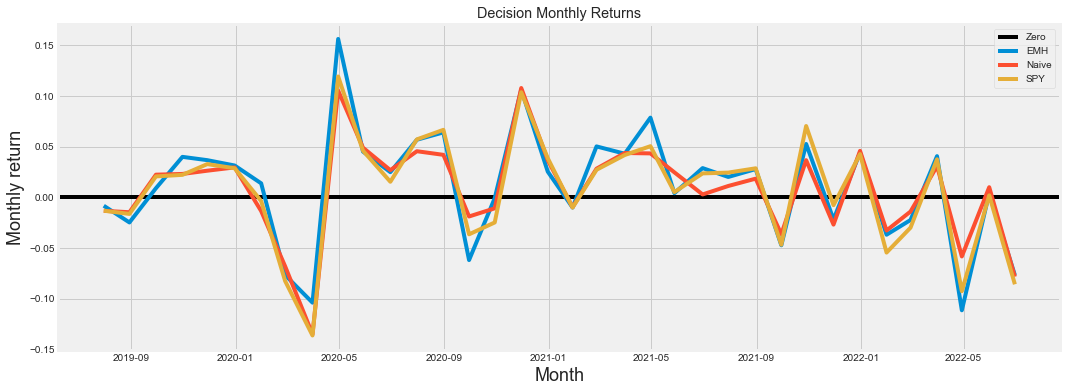

In [17]:
plt.figure(figsize=(16,6))
plt.title("Decision Monthly Returns")
plt.xlabel('Month', fontsize=18)
plt.ylabel('Monthly return', fontsize=18)


plt.axhline(y=0.0, linestyle='-', color='black')
plt.plot(month_cum_returns['EMH-RET'])
plt.plot(month_cum_returns['Naive-RET'])
plt.plot(month_cum_returns['SPY'])

plt.legend(['Zero','EMH','Naive','SPY'])

plt.show()

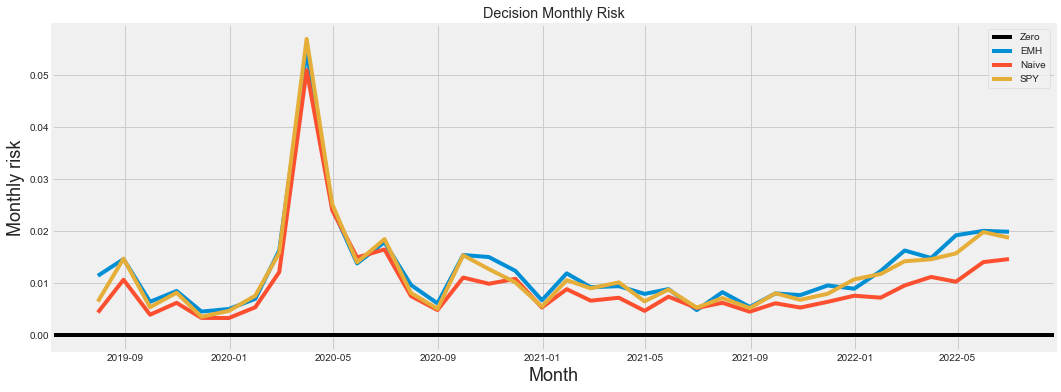

In [18]:
plt.figure(figsize=(16,6))
plt.title("Decision Monthly Risk")
plt.xlabel('Month', fontsize=18)
plt.ylabel('Monthly risk', fontsize=18)


plt.axhline(y=0.0, color='k', linestyle='-')
plt.plot(month_cum_returns['EMH-RET-sdp'])
plt.plot(month_cum_returns['Naive-RET-sdp'])
plt.plot(month_cum_returns['SPY-sdp'])


plt.legend(['Zero','EMH','Naive','SPY'])

plt.show()

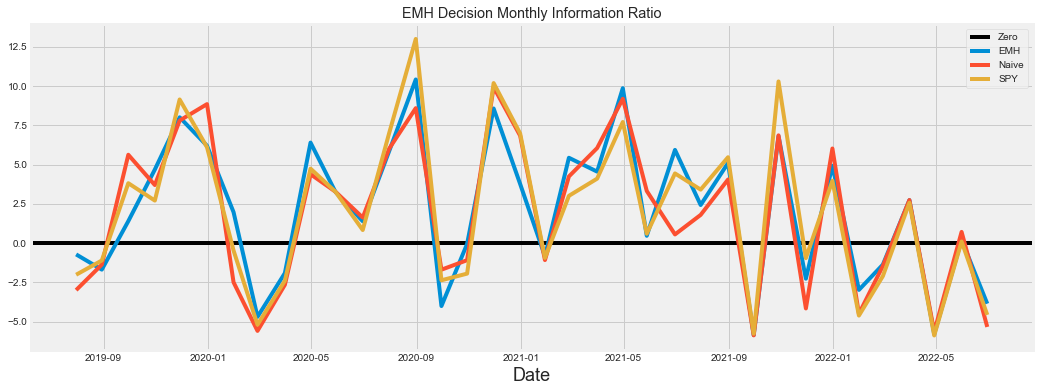

In [19]:
plt.figure(figsize=(16,6))
plt.title("EMH Decision Monthly Information Ratio")
plt.xlabel('Date', fontsize=18)

plt.axhline(y=0.0, color='k', linestyle='-')
plt.plot(month_cum_returns['EMH-RET-IR'])
plt.plot(month_cum_returns['Naive-RET-IR'])
plt.plot(month_cum_returns['SPY-IR'])


plt.legend(['Zero','EMH','Naive','SPY'])
plt.show()

In [20]:
pmf_values = np.array([x for x in agg_data['PMF Rank Vector'].values])
submission = agg_data.filter('PMF Rank Vector')
for i in range(5):
    submission[f'Rank {i+1}'] = pmf_values[:,i]
    
submission['Decision'] = agg_data['EMH Decision']
#submission.to_csv('submission.csv')
submission

Datestring,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Decision
Symbols,,,,,,
ABBV,0.114,0.143,0.229,0.114,0.400,0.0339
ACN,0.229,0.114,0.114,0.286,0.257,0.0236
AEP,0.286,0.057,0.171,0.229,0.257,0.0063
AIZ,0.114,0.257,0.200,0.143,0.286,0.0012
ALLE,0.229,0.229,0.171,0.200,0.171,0.0012
AMAT,0.200,0.114,0.114,0.257,0.314,0.0114
AMP,0.171,0.143,0.171,0.257,0.257,0.0035
AMZN,0.286,0.200,0.143,0.114,0.257,0.1609
AVB,0.229,0.114,0.257,0.171,0.229,0.0036
